In [1]:
#Website created in Jupyter, because ¯\_(ツ)_/¯

## Neel Shivdasani
### Data science product manager at MailChimp
[Twitter](http://twitter.dataneel.com) - [LinkedIn](http://linkedin.dataneel.com) - [GitHub](http://github.dataneel.com)

Hi! My name is Neel Shivdasani, and I'm a data science product manager at [MailChimp](https://mailchimp.com/about/jobs/all/) in [Atlanta, Ga](https://www.youtube.com/watch?v=j5W73HaVQBg). I'm also on the advisory board for the [Southern Data Science Conference](https://www.southerndatascience.com/), and I used to be an organizer of [PyData ATL](https://www.meetup.com/PyData-Atlanta/) (which I still like to attend).

##### I often use these libraries

In [2]:
import pandas as pd
import sklearn
import numpy as np

##### I sometimes start personal projects
They include [The Atlanta Art Map](http://atlantaartmap.com) and other items from [my github](http://github.com/dataneel). I like to think they'd all be better if I started them now, but I've moved on to other things.

##### I also occasionally write blog posts for MailChimp
My favorites are about our [product recommendation feature](https://blog.mailchimp.com/introducing-product-recommendations/) and [emoji map](http://blog.mailchimp.com/mailchimps-most-popular-subject-line-emojis/). You can find the rest [here](http://blog.mailchimp.com/author/neel_s/).

In [3]:
from IPython.display import Image
#Graph visualization from my emoji post
Image(url= "https://blog.mailchimp.com/wp-content/uploads/2015/05/mailchimp_emoji-1008x839.jpg")

##### And here is my life in a few data points

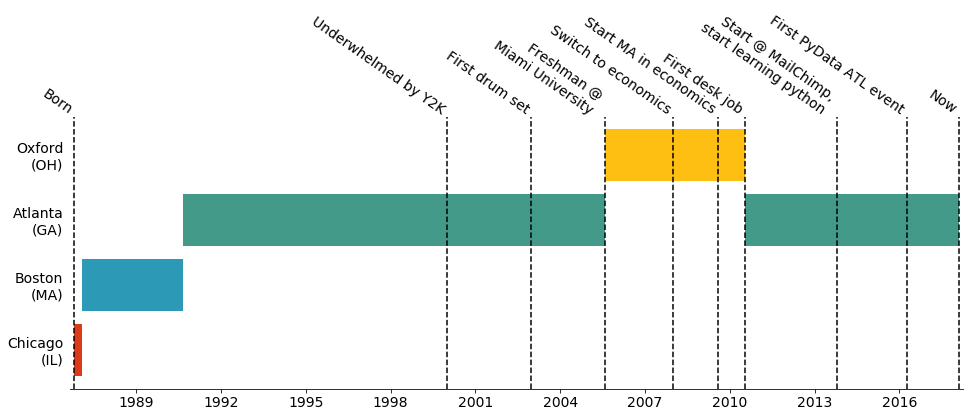

In [4]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

font = {'family': 'sans-serif',
        'weight': 'light',
        'size'   : 14}
plt.rc('font', **font)

events = pd.read_csv('life_events.csv',parse_dates={'datetime':['date']})
events['datenum'] = events.datetime.apply(mdates.date2num)

moves = pd.read_csv('relocations.csv', parse_dates={'datetime':['date']})
moves['datenum'] = moves.datetime.apply(mdates.date2num)
moves['datenum_end'] = moves.datenum.shift(-1).fillna(events.datenum.max())
city_chron = moves.groupby('location').min()['datenum'].sort_values().index.values

fig, ax = plt.subplots(figsize=(16,5))
ax.xaxis_date()
formatter = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(mdates.YearLocator(3))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlim([events.datenum.min()-50,events.datenum.max()+50])
plt.yticks(range(len(city_chron)),city_chron)
ax.tick_params(left="off")
colors = ["#DB3A1B","#2C9AB7","#449A88","#FEBE12"]

for i, location in moves.iterrows():
    y = np.where(city_chron == location.location)[0][0]
    duration = location['datenum_end']-location['datenum']
    ax.barh(bottom = y, width = duration, left=location['datenum'], color = colors[y])

for i, event in events.iterrows():
    ax.axvline(event.datenum, color='k', linestyle='dashed')
    plt.text(event.datenum, len(city_chron)-.4, event.event, rotation=-35, ha='right', va='bottom')

##### Thanks for visiting!

In [5]:
!!jupyter nbconvert --to html ./my_website.ipynb --output ./index.html

['[NbConvertApp] Converting notebook ./my_website.ipynb to html',
 '[NbConvertApp] Writing 327229 bytes to ././index.html']